# SPORF Tutorial

The purpose of this tutorial is to prove that this pure python implementation of SPORF is identical, in terms of functionality, to the one used in the SPORF paper (Tomita, Tyler M., et al. "Sparse projection oblique randomer forests." Journal of Machine Learning Research 21.104 (2020): 1-39.). In order to do this, this notebook runs this implementation of SPORF on 3 different data sets: hill valley, acute inflammation task 1, and acute inflammation task 2. Cohen's Kappa (fractional decrease in error rate over the chance error rate) is the metric that is being used to compare the implementations. If this implementation has the same kappa values (for the same data sets) as the one in the SPORF paper, we can say with confidence that this implementation is accurate. The datasets used in this notebook all had kappa values of 100 ± 0 in the SPORF paper implementation, which is also what is found when run on this SPORF implementation, as seen below. Thus, we can say with confidence that this implementation of SPORF is accurate.

## Import required packages

In [36]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from proglearn.progressive_learner import ProgressiveLearner
from proglearn.forest import LifelongClassificationForest
from proglearn.voters import TreeClassificationVoter
from proglearn.transformers import TreeClassificationTransformer
from proglearn.transformers import ObliqueTreeClassificationTransformer
from proglearn.deciders import SimpleArgmaxAverage

from sklearn.model_selection import train_test_split, cross_val_score

from sporf_tutorial_functions import *

In /home/jmandav1/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/jmandav1/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/jmandav1/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/jmandav1/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/jmandav1/.local/lib/python3.6/site-packages/matplotlib/

## SPORF

## Set parameters and run on hill valley without noise data

In [2]:
max_depth = 10
feature_combinations = 2
density = 0.01
reps = 5
n_trees = 10
task_num = 1

kwargs = {"kwargs" : {"max_depth" : max_depth, "feature_combinations" : feature_combinations, "density" : density}}

kappa, err = test("https://archive.ics.uci.edu/ml/machine-learning-databases/hill-valley/Hill_Valley_without_noise_Training.data", reps, n_trees, task_num,
                            ObliqueTreeClassificationTransformer,
                            kwargs)

print("kappa: ", kappa, ", error:", err)

Accuracy after iteration  0 :  1.0
Accuracy after iteration  1 :  1.0
Accuracy after iteration  2 :  1.0
Accuracy after iteration  3 :  1.0
Accuracy after iteration  4 :  1.0
kappa:  100.0 , error: 0.0


## Set parameters and run on acute inflammation task 1 data

In [3]:
max_depth = 10
feature_combinations = 1.5
density = 0.5
reps = 5
n_trees = 10
task_num = 1

kwargs = {"kwargs" : {"max_depth" : max_depth, "feature_combinations" : feature_combinations, "density" : density}}

kappa, err = test("https://archive.ics.uci.edu/ml/machine-learning-databases/acute/diagnosis.data", reps, n_trees, task_num,
                            ObliqueTreeClassificationTransformer,
                            kwargs)

print("kappa: ", kappa, ", error:", err)

Accuracy after iteration  0 :  1.0
Accuracy after iteration  1 :  1.0
Accuracy after iteration  2 :  1.0
Accuracy after iteration  3 :  1.0
Accuracy after iteration  4 :  1.0
kappa:  100.0 , error: 0.0


## Set parameters and run on acute inflammation task 2 data

In [4]:
max_depth = 10
feature_combinations = 1.5
density = 0.5
reps = 5
n_trees = 10
task_num = 2

kwargs = {"kwargs" : {"max_depth" : max_depth, "feature_combinations" : feature_combinations, "density" : density}}

kappa, err = test("https://archive.ics.uci.edu/ml/machine-learning-databases/acute/diagnosis.data", reps, n_trees, task_num,
                            ObliqueTreeClassificationTransformer,
                            kwargs)

print("kappa: ", kappa, ", error:", err)

Accuracy after iteration  0 :  1.0
Accuracy after iteration  1 :  1.0
Accuracy after iteration  2 :  1.0
Accuracy after iteration  3 :  1.0
Accuracy after iteration  4 :  1.0
kappa:  100.0 , error: 0.0


## Random Forest (RF)

Now we will run the same datasets on a base Random forest. The goal of this is to show how SPORF can clearly outperform or perform as well as the Random Forest algorithm. As seen by the results below, SPORF has a much higher kappa value, than RF, for the hill valley without noise data and has the same value for the acute inflammation data sets. Having a high kappa value is desired since as mentioned above, it is a measure of how much the error rate over the chance error rate decreases.

## Set parameters and run on hill valley without noise data

In [5]:
max_depth = 10
feature_combinations = 2
density = 0.01
reps = 5
n_trees = 10
task_num = 1

kwargs = {"kwargs" : {"max_depth" : max_depth} }

kappa, err = test("https://archive.ics.uci.edu/ml/machine-learning-databases/hill-valley/Hill_Valley_without_noise_Training.data", reps, n_trees, task_num,
                            TreeClassificationTransformer,
                            kwargs)

print("kappa: ", kappa, ", error:", err)

Accuracy after iteration  0 :  0.5409836065573771
Accuracy after iteration  1 :  0.5901639344262295
Accuracy after iteration  2 :  0.5901639344262295
Accuracy after iteration  3 :  0.6885245901639344
Accuracy after iteration  4 :  0.5245901639344263
kappa:  17.37704918032787 , error: 5.1130724431784715


## Set parameters and run on acute inflammation task 1 data

In [6]:
max_depth = 10
feature_combinations = 1.5
density = 0.5
reps = 5
n_trees = 10
task_num = 1

kwargs = {"kwargs" : {"max_depth" : max_depth} }

kappa, err = test("https://archive.ics.uci.edu/ml/machine-learning-databases/acute/diagnosis.data", reps, n_trees, task_num,
                            TreeClassificationTransformer,
                            kwargs)

print("kappa: ", kappa, ", error:", err)

Accuracy after iteration  0 :  1.0
Accuracy after iteration  1 :  1.0
Accuracy after iteration  2 :  1.0
Accuracy after iteration  3 :  1.0
Accuracy after iteration  4 :  1.0
kappa:  100.0 , error: 0.0


## Set parameters and run on acute inflammation task 2 data

In [7]:
max_depth = 10
feature_combinations = 1.5
density = 0.5
reps = 5
n_trees = 10
task_num = 2

kwargs = {"kwargs" : {"max_depth" : max_depth} }

kappa, err = test("https://archive.ics.uci.edu/ml/machine-learning-databases/acute/diagnosis.data", reps, n_trees, task_num,
                            TreeClassificationTransformer,
                            kwargs)

print("kappa: ", kappa, ", error:", err)

Accuracy after iteration  0 :  1.0
Accuracy after iteration  1 :  1.0
Accuracy after iteration  2 :  1.0
Accuracy after iteration  3 :  1.0
Accuracy after iteration  4 :  1.0
kappa:  100.0 , error: 0.0


## Conclusions

From the results obtained in this notebook, it is possible to conclude that this implementation of SPORF is accurate. Furthermore, it is possible to see how SPORF can be very useful, especially in a model utilizing ensembling. It can do much better than RF on certain datasets while maintaining the high kappa values seen on the datasets that RF performed well on.

In [2]:
max_depth = 10
feature_combinations = 1.5
density = 0.5
reps = 10
n_trees = 10
task_num = 2
sample_size = 2000

X_train, y_train = load_simulated_data('Orthant_train.csv')
X_test, y_test = load_simulated_data('Orthant_test.csv')
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test))
n_classes = len(np.unique(y))

# print(len(np.unique(np.concatenate((y_train, y_test)))))
# print(np.amax(np.concatenate((y_train, y_test))) + 1)

kappa = np.zeros(reps)
for i in range(reps):
    # idx = np.random.randint(len(X_train), size=sample_size)
    
    # X_train = X_train[idx,:]
    # y_train = y_train[idx]
    
    # X_train = X_train[:sample_size,:]
    # y_train = y_train[:sample_size]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=sample_size, shuffle=True, stratify=y)
    
    # X_test = X_test[:400,:]
    # y_test = y_test[:400]
            
    kwargs = {"kwargs" : {"max_depth" : max_depth, "feature_combinations" : feature_combinations, "density" : density}}

    default_decider_kwargs = {"classes": np.arange(n_classes)}

    pl = ProgressiveLearner(
        default_transformer_class=ObliqueTreeClassificationTransformer,
        default_transformer_kwargs=kwargs,
        default_voter_class=TreeClassificationVoter,
        default_voter_kwargs={},
        default_decider_class=SimpleArgmaxAverage,
        default_decider_kwargs=default_decider_kwargs)

    pl.add_task(X_train, y_train, num_transformers=n_trees)

    y_hat = pl.predict(X_test, task_id=0)

    acc = np.sum(y_test == y_hat) / len(y_test)
    print("Accuracy after iteration ", i, ": ", acc)

    chance_pred = 1 / n_classes
    kappa[i] = (acc - chance_pred) / (1 - chance_pred)

kap = np.mean(kappa) * 100
err = (np.std(kappa) * 100) / np.sqrt(reps)

print("kappa: ", kap, ", error:", err)

Accuracy after iteration  0 :  0.8184
Accuracy after iteration  1 :  0.7984
Accuracy after iteration  2 :  0.7975
Accuracy after iteration  3 :  0.7906
Accuracy after iteration  4 :  0.8352
Accuracy after iteration  5 :  0.82
Accuracy after iteration  6 :  0.7774
Accuracy after iteration  7 :  0.7925
Accuracy after iteration  8 :  0.8323
Accuracy after iteration  9 :  0.783
kappa:  80.14273015873016 , error: 0.6236551094478738


In [35]:
max_depth = 10
feature_combinations = 1.5
density = 0.1
reps = 10
n_trees = 20
task_num = 2
sample_size = 400

X_train, y_train = load_simulated_data('Orthant_train.csv')
X_test, y_test = load_simulated_data('Orthant_test.csv')
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test))
n_classes = len(np.unique(y))

kappa = np.zeros(reps)
for i in range(reps):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=sample_size, shuffle=True, stratify=y)
            
    kwargs = {"kwargs" : {"max_depth" : max_depth} }

    default_decider_kwargs = {"classes": np.arange(n_classes)}

    pl = ProgressiveLearner(
        default_transformer_class=ObliqueTreeClassificationTransformer,
        default_transformer_kwargs=kwargs,
        default_voter_class=TreeClassificationVoter,
        default_voter_kwargs={},
        default_decider_class=SimpleArgmaxAverage,
        default_decider_kwargs=default_decider_kwargs)

    pl.add_task(X_train, y_train)

    y_hat = pl.predict(X_test, task_id=0)

    acc = np.sum(y_test == y_hat) / len(y_test)
    print("Accuracy after iteration ", i, ": ", acc)

    chance_pred = 1 / n_classes
    kappa[i] = (acc - chance_pred) / (1 - chance_pred)
    
    i += 1

kap = np.mean(kappa) * 100
err = (np.std(kappa) * 100) / np.sqrt(reps)

print("kappa: ", kap, ", error:", err)

Accuracy after iteration  0 :  0.01189655172413793
Accuracy after iteration  1 :  0.028448275862068967
Accuracy after iteration  2 :  0.05353448275862069
Accuracy after iteration  3 :  0.02293103448275862
Accuracy after iteration  4 :  0.065
Accuracy after iteration  5 :  0.03189655172413793
Accuracy after iteration  6 :  0.0578448275862069
Accuracy after iteration  7 :  0.05146551724137931
Accuracy after iteration  8 :  0.053189655172413794
Accuracy after iteration  9 :  0.028620689655172414
kappa:  2.5252326217843466 , error: 0.5413244938992237


In [7]:
max_depth = 10
feature_combinations = 1.5
density = 0.1
reps = 10
n_trees = 10
task_num = 2
sample_size = 2000

X_train, y_train = load_simulated_data('Orthant_train.csv')
X_test, y_test = load_simulated_data('Orthant_test.csv')
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test))
n_classes = len(np.unique(y))

kappa = np.zeros(reps)
for i in range(reps):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=sample_size, shuffle=True, stratify=y)

    kwargs = {"kwargs" : {"max_depth" : max_depth, "feature_combinations" : feature_combinations, "density" : density}}

    default_decider_kwargs = {"classes": np.arange(n_classes)}

    pl = ProgressiveLearner(
        default_transformer_class=ObliqueTreeClassificationTransformer,
        default_transformer_kwargs=kwargs,
        default_voter_class=TreeClassificationVoter,
        default_voter_kwargs={},
        default_decider_class=SimpleArgmaxAverage,
        default_decider_kwargs=default_decider_kwargs)

    pl.add_task(X_train, y_train, num_transformers=n_trees)

    y_hat = pl.predict(X_test, task_id=0)

    acc = np.sum(y_test == y_hat) / len(y_test)
    print("Accuracy after iteration ", i, ": ", acc)

    chance_pred = 1 / n_classes
    kappa[i] = (acc - chance_pred) / (1 - chance_pred)

kap = np.mean(kappa) * 100
err = (np.std(kappa) * 100) / np.sqrt(reps)

print("kappa: ", kap, ", error:", err)

Accuracy after iteration  0 :  0.9647
Accuracy after iteration  1 :  0.9802
Accuracy after iteration  2 :  0.9735
Accuracy after iteration  3 :  0.9584
Accuracy after iteration  4 :  0.975
Accuracy after iteration  5 :  0.9732
Accuracy after iteration  6 :  0.9687
Accuracy after iteration  7 :  0.964
Accuracy after iteration  8 :  0.9685
Accuracy after iteration  9 :  0.9699
kappa:  96.91276190476191 , error: 0.1907594761142605


In [11]:
max_depth = 10
feature_combinations = 1.5
density = 0.1
reps = 10
n_trees = 20
task_num = 2
sample_size = 2000

X_train, y_train = load_simulated_data('Orthant_train.csv')
X_test, y_test = load_simulated_data('Orthant_test.csv')
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test))
n_classes = len(np.unique(y))

kappa = np.zeros(reps)
for i in range(reps):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=sample_size, shuffle=True, stratify=y)

    kwargs = {"kwargs" : {"max_depth" : max_depth, "feature_combinations" : feature_combinations, "density" : density}}

    default_decider_kwargs = {"classes": np.arange(n_classes)}

    pl = ProgressiveLearner(
        default_transformer_class=ObliqueTreeClassificationTransformer,
        default_transformer_kwargs=kwargs,
        default_voter_class=TreeClassificationVoter,
        default_voter_kwargs={},
        default_decider_class=SimpleArgmaxAverage,
        default_decider_kwargs=default_decider_kwargs)

    pl.add_task(X_train, y_train, num_transformers=n_trees)

    y_hat = pl.predict(X_test, task_id=0)

    acc = np.sum(y_test == y_hat) / len(y_test)
    print("Accuracy after iteration ", i, ": ", acc)

    chance_pred = 1 / n_classes
    kappa[i] = (acc - chance_pred) / (1 - chance_pred)

kap = np.mean(kappa) * 100
err = (np.std(kappa) * 100) / np.sqrt(reps)

print("kappa: ", kap, ", error:", err)

Accuracy after iteration  0 :  0.9843
Accuracy after iteration  1 :  0.9881
Accuracy after iteration  2 :  0.9898
Accuracy after iteration  3 :  0.9872
Accuracy after iteration  4 :  0.9891
Accuracy after iteration  5 :  0.985
Accuracy after iteration  6 :  0.9898
Accuracy after iteration  7 :  0.9826
Accuracy after iteration  8 :  0.99
Accuracy after iteration  9 :  0.9899
kappa:  98.7382857142857 , error: 0.08255241904175008


In [2]:
max_depth = 10
feature_combinations = 1.5
density = 0.1
reps = 10
n_trees = 20
task_num = 2
sample_size = 4000

X_train, y_train = load_simulated_data('Orthant_train.csv')
X_test, y_test = load_simulated_data('Orthant_test.csv')
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test))
n_classes = len(np.unique(y))

kappa = np.zeros(reps)
for i in range(reps):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=sample_size, shuffle=True, stratify=y)

    kwargs = {"kwargs" : {"max_depth" : max_depth, "feature_combinations" : feature_combinations, "density" : density}}

    default_decider_kwargs = {"classes": np.arange(n_classes)}

    pl = ProgressiveLearner(
        default_transformer_class=ObliqueTreeClassificationTransformer,
        default_transformer_kwargs=kwargs,
        default_voter_class=TreeClassificationVoter,
        default_voter_kwargs={},
        default_decider_class=SimpleArgmaxAverage,
        default_decider_kwargs=default_decider_kwargs)

    pl.add_task(X_train, y_train, num_transformers=n_trees)

    y_hat = pl.predict(X_test, task_id=0)

    acc = np.sum(y_test == y_hat) / len(y_test)
    print("Accuracy after iteration ", i, ": ", acc)

    chance_pred = 1 / n_classes
    kappa[i] = (acc - chance_pred) / (1 - chance_pred)

kap = np.mean(kappa) * 100
err = (np.std(kappa) * 100) / np.sqrt(reps)

print("kappa: ", kap, ", error:", err)

Accuracy after iteration  0 :  0.993625
Accuracy after iteration  1 :  0.99425
Accuracy after iteration  2 :  0.995
Accuracy after iteration  3 :  0.99375
Accuracy after iteration  4 :  0.992875
Accuracy after iteration  5 :  0.995125
Accuracy after iteration  6 :  0.997
Accuracy after iteration  7 :  0.995625
Accuracy after iteration  8 :  0.995375
Accuracy after iteration  9 :  0.995625
kappa:  99.4742857142857 , error: 0.03685603542079342


In [34]:
max_depth = 10
feature_combinations = 1.5
density = 0.5
reps = 10
n_trees = 20
task_num = 2
sample_size = 400

X_train, y_train = load_simulated_data('Orthant_train.csv')
X_test, y_test = load_simulated_data('Orthant_test.csv')
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test))
n_classes = len(np.unique(y))

kappa = np.zeros(reps)
for i in range(reps):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=sample_size, shuffle=True, stratify=y)
            
    kwargs = {"kwargs" : {"max_depth" : max_depth} }

    default_decider_kwargs = {"classes": np.arange(n_classes)}

    pl = ProgressiveLearner(
        default_transformer_class=TreeClassificationTransformer,
        default_transformer_kwargs=kwargs,
        default_voter_class=TreeClassificationVoter,
        default_voter_kwargs={},
        default_decider_class=SimpleArgmaxAverage,
        default_decider_kwargs=default_decider_kwargs)

    pl.add_task(X_train, y_train)

    y_hat = pl.predict(X_test, task_id=0)

    acc = np.sum(y_test == y_hat) / len(y_test)
    print("Accuracy after iteration ", i, ": ", acc)

    chance_pred = 1 / n_classes
    kappa[i] = (acc - chance_pred) / (1 - chance_pred)
    
    i += 1

kap = np.mean(kappa) * 100
err = (np.std(kappa) * 100) / np.sqrt(reps)

print("kappa: ", kap, ", error:", err)

Accuracy after iteration  0 :  0.06318965517241379
Accuracy after iteration  1 :  0.11853448275862069
Accuracy after iteration  2 :  0.12862068965517243
Accuracy after iteration  3 :  0.07793103448275862
Accuracy after iteration  4 :  0.16775862068965516
Accuracy after iteration  5 :  0.34706896551724137
Accuracy after iteration  6 :  0.08560344827586207
Accuracy after iteration  7 :  0.23594827586206896
Accuracy after iteration  8 :  0.10112068965517242
Accuracy after iteration  9 :  0.10982758620689655
kappa:  12.996606458675425 , error: 2.657843220350645


In [10]:
max_depth = 10
feature_combinations = 1.5
density = 0.5
reps = 10
n_trees = 20
task_num = 2
sample_size = 2000

X_train, y_train = load_simulated_data('Orthant_train.csv')
X_test, y_test = load_simulated_data('Orthant_test.csv')
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test))
n_classes = len(np.unique(y))

kappa = np.zeros(reps)
for i in range(reps):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=sample_size, shuffle=True, stratify=y)
            
    kwargs = {"kwargs" : {"max_depth" : max_depth} }

    default_decider_kwargs = {"classes": np.arange(n_classes)}

    pl = ProgressiveLearner(
        default_transformer_class=TreeClassificationTransformer,
        default_transformer_kwargs=kwargs,
        default_voter_class=TreeClassificationVoter,
        default_voter_kwargs={},
        default_decider_class=SimpleArgmaxAverage,
        default_decider_kwargs=default_decider_kwargs)

    pl.add_task(X_train, y_train, num_transformers=n_trees)

    y_hat = pl.predict(X_test, task_id=0)

    acc = np.sum(y_test == y_hat) / len(y_test)
    print("Accuracy after iteration ", i, ": ", acc)

    chance_pred = 1 / n_classes
    kappa[i] = (acc - chance_pred) / (1 - chance_pred)

kap = np.mean(kappa) * 100
err = (np.std(kappa) * 100) / np.sqrt(reps)

print("kappa: ", kap, ", error:", err)

Accuracy after iteration  0 :  0.994
Accuracy after iteration  1 :  0.992
Accuracy after iteration  2 :  0.9933
Accuracy after iteration  3 :  0.9953
Accuracy after iteration  4 :  0.9952
Accuracy after iteration  5 :  0.9952
Accuracy after iteration  6 :  0.9951
Accuracy after iteration  7 :  0.9922
Accuracy after iteration  8 :  0.9959
Accuracy after iteration  9 :  0.9949
kappa:  99.42196825396825 , error: 0.041847310304159606


In [3]:
max_depth = 10
feature_combinations = 1.5
density = 0.5
reps = 10
n_trees = 20
task_num = 2
sample_size = 4000

X_train, y_train = load_simulated_data('Orthant_train.csv')
X_test, y_test = load_simulated_data('Orthant_test.csv')
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test))
n_classes = len(np.unique(y))

kappa = np.zeros(reps)
for i in range(reps):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=sample_size, shuffle=True, stratify=y)
            
    kwargs = {"kwargs" : {"max_depth" : max_depth} }

    default_decider_kwargs = {"classes": np.arange(n_classes)}

    pl = ProgressiveLearner(
        default_transformer_class=TreeClassificationTransformer,
        default_transformer_kwargs=kwargs,
        default_voter_class=TreeClassificationVoter,
        default_voter_kwargs={},
        default_decider_class=SimpleArgmaxAverage,
        default_decider_kwargs=default_decider_kwargs)

    pl.add_task(X_train, y_train, num_transformers=n_trees)

    y_hat = pl.predict(X_test, task_id=0)

    acc = np.sum(y_test == y_hat) / len(y_test)
    print("Accuracy after iteration ", i, ": ", acc)

    chance_pred = 1 / n_classes
    kappa[i] = (acc - chance_pred) / (1 - chance_pred)

kap = np.mean(kappa) * 100
err = (np.std(kappa) * 100) / np.sqrt(reps)

print("kappa: ", kap, ", error:", err)

Accuracy after iteration  0 :  0.997375
Accuracy after iteration  1 :  0.997625
Accuracy after iteration  2 :  0.997
Accuracy after iteration  3 :  0.997
Accuracy after iteration  4 :  0.99775
Accuracy after iteration  5 :  0.998125
Accuracy after iteration  6 :  0.99725
Accuracy after iteration  7 :  0.99775
Accuracy after iteration  8 :  0.997
Accuracy after iteration  9 :  0.997375
kappa:  99.73841269841269 , error: 0.011665964777505356


SPORF: 
    400: 0.5413244938992237
    2000: 0.08255241904175008
    4000: 0.03685603542079342
    
RF:
    400: 2.657843220350645
    2000: 0.041847310304159606
    4000: 0.011665964777505356

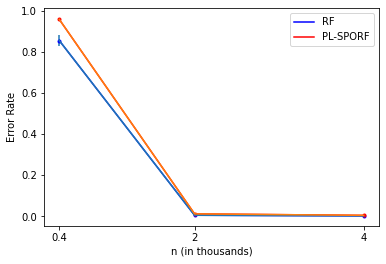

In [88]:
x = [0.4, 2, 4]
rf_err = [0.027578375474818975, 0.0004342170476207093, 0.0001210486587194541]
sporf_err = [0.005616903973929505, 0.0008565823564219231, 0.00038242646351946153]
rf = [1-0.14356034482759, 1-0.99431, 1-0.997425]
sporf = [1-0.04048275862069, 1-0.98758, 1-0.994825]
my_xticks = ["0.4", "2", "4"]


plt.plot(x, rf, "b", label="RF")
plt.plot(x, sporf, "r")
plt.plot(x, rf, "b.")
plt.errorbar(x, rf, yerr=rf_err)
plt.plot(x, sporf, "r.")
plt.errorbar(x, sporf, yerr=sporf_err)
plt.xticks(x, my_xticks)
plt.xlabel("n (in thousands)")
plt.ylabel("Error Rate")
plt.legend(["RF", "PL-SPORF"])

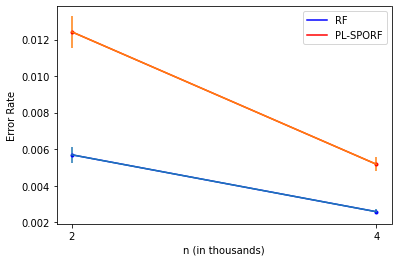

In [89]:
x = [2, 4]
rf_err = [0.0004342170476207093, 0.0001210486587194541]
sporf_err = [0.0008565823564219231, 0.00038242646351946153]
rf = [1-0.99431, 1-0.997425]
sporf = [1-0.98758, 1-0.994825]
my_xticks = ["2", "4"]


plt.plot(x, rf, "b", label="RF")
plt.plot(x, sporf, "r")
plt.plot(x, rf, "b.")
plt.errorbar(x, rf, yerr=rf_err)
plt.plot(x, sporf, "r.")
plt.errorbar(x, sporf, yerr=sporf_err)
plt.xticks(x, my_xticks)
plt.xlabel("n (in thousands)")
plt.ylabel("Error Rate")
plt.legend(["RF", "PL-SPORF"])

In [87]:
a = [0.997375, 0.997625, 0.997, 0.997, 0.99775, 0.998125, 0.99725, 0.99775, 0.997, 0.997375]
    
ones = np.ones(len(a))
print(ones - a)
data = ones-a

from scipy.stats import sem

sem(data)

[0.002625 0.002375 0.003    0.003    0.00225  0.001875 0.00275  0.00225
 0.003    0.002625]


0.0001210486587194541